In [ ]:
Plan:
    1. requirements:
        *Jupyter notebook
        *Pandas
        *Our Data
        
    2. Load Data
    3. Quick overview
    4. Data preparation / Data manipulation / Feature engineering
    5. Data mining / Exploration
        *slicing
        *group by
        *descriptive statistics
        *data visualization
    


In [ ]:
#Load libraries
import pandas.io.sql
import pyodbc

In [ ]:
#Option1
#data = pd.read_csv('./Desktop/Python/sql_data.csv')

In [123]:
#Option2

# Parameters, server name and database name
server = 'sql246'
db = 'G_REPORTS'


# Create the connection
conn = pyodbc.connect('DRIVER={SQL Server};SERVER=' + server + ';DATABASE=' + db + ';Trusted_Connection=yes')

# assign to sql variable, then write the query itself between """query"""
sql = """


select  ps.pmxid, ps.surveyid, ss.name,ps.timestamp, s.[status], p.countryofresidence, s.pollingpoints, SurveysFromReactivation=(select count(sp.visa) from samples sp where sp.pmxid=ps.pmxid and sp.creationtimestamp > ps.timestamp ), PointsFromReactivation=(select sum(pp.points) from pollingpoints pp where ps.pmxid=pp.pmxid and  pp.timestamp > ps.timestamp ), p.age, b.sourceid, DATEDIFF(day, s.confirmtimestamp, GETDATE()) as DaysInThePanel

from pollingpoints ps  

inner join pm_status s on s.pmxid=ps.pmxid
inner join pm_base b on b.pmxid=ps.pmxid
inner join surveys ss on ss.id=ps.surveyid
left outer join G_PDL.dbo.PDL_10 p on p.pmxid=ps.pmxid

where  b.panelid=10 ---PanelID
and ps.surveyid in (588034, 600412, 610800, 620078, 642834, 650520, 650522, 642888, 629084, 620076, 610802, 600408, 588032)---SurveyID

group by ps.pmxid, s.pollingpoints, p.countryofresidence, ps.surveyid, ss.name, s.[status] , timestamp, p.age, b.sourceid, s.confirmtimestamp

"""

# assign query to dataframe
df = pd.read_sql(sql, conn)


In [188]:
#Quick overview

df.shape


(51231, 12)

In [187]:
df.head(2)

,pmxid,surveyid,name,timestamp,status,countryofresidence,pollingpoints,SurveysFromReactivation,PointsFromReactivation,age,sourceid,DaysInThePanel
0,2390275,588034,NearDormants_Marketing_Calls_2018Jan,2018-02-02 17:40:00,1,5.0,3360,8,200.0,39.0,4337,3133.0
1,2429889,588034,NearDormants_Marketing_Calls_2018Jan,2018-02-07 03:57:00,1,18.0,2825,75,500.0,42.0,4337,3129.0


In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51231 entries, 0 to 51230
Data columns (total 12 columns):
pmxid                      51231 non-null int64
surveyid                   51231 non-null int64
name                       51231 non-null object
timestamp                  51231 non-null datetime64[ns]
status                     51231 non-null int64
countryofresidence         51217 non-null float64
pollingpoints              51231 non-null int64
SurveysFromReactivation    51231 non-null int64
PointsFromReactivation     28101 non-null float64
age                        51217 non-null float64
sourceid                   51231 non-null int64
DaysInThePanel             50526 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(6), object(1)
memory usage: 4.7+ MB


In [183]:
sources = (MENA.groupby(['sourceid']).count())
sources.pmxid.sort_values(ascending=False)

sourceid
Referral                                              6439
Organic                                               3880
India_Facebook_T1_201709                               564
India_Facebook_T2_201709                               530
India_Facebook_Males_18-44_201705                      429
4337                                                   428
India_Facebook_Females_18+_201712                      282
India_Facebook_Females_18-44_201705                    254
ME_Bayt_201301                                         199
India_Facebook_Males_45+_201705                        127
India_Facebook_Females_18+_201709                       69
MENA_Hsoub_KSA_Nationals_201701                         64
India_Facebook_18+_201705                               59
MENA_UAE_Adwords_Abu_Dhabi_EN_201602                    59
India_Facebook_Females_45+_201705                       58
ME_Banner_winnersEng_201302                             55
56658                                          

In [124]:
#dataframe slicing
MENA = df[(df['countryofresidence'] == 115) | (df['countryofresidence'] == 14) | (df['countryofresidence'] == 18)]
MENA.head(2)
MENA.shape

MENA['countryofresidence'] = MENA.countryofresidence.astype(int)

C:\Users\muthana.hamad\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [98]:
len(df), len(MENA)

(51231, 14935)

In [99]:
MENA.head(2)

,pmxid,surveyid,name,timestamp,status,countryofresidence,pollingpoints,SurveysFromReactivation,PointsFromReactivation,age,sourceid,DaysInThePanel
3,5017278,610800,NearDormants_Marketing_Calls_2018Mar,2018-03-31 05:53:00,1,18,4135,83,420.0,33.0,-1,3811.0
4,5030609,610800,NearDormants_Marketing_Calls_2018Mar,2018-04-03 05:12:00,1,18,2345,93,2050.0,52.0,-1,3726.0


In [152]:
#Data preparation / Data manipulation / Feature engineering
def source(x):
    if x== -1:
        return 'Organic'
    if x== -2:
        return 'Referral'
    if x==1364134:
        return 'PK_Facebook_Females_65+_201808'
    if x==1364132:
        return 'PK_Facebook_Females_45_64_201808'
    if x==1362700:
        return 'KSA_Digital_Mates_Nationals_40+_201807'
    if x==1360250:
        return 'MENA_Bayt_JobIndex_en_20180727_Website'
    if x==1360246:
        return 'MENA_Bayt_JobIndex_ar_20180727_Website'
    if x==1343932:
        return 'MENA_PK_Facebook_18+_EN_201806'
    if x==1342400:
        return 'PK_Aftab_Other_EN_201806'
    if x==1342394:
        return 'PK_Aftab_Other_Urdu_201806'
    if x==1342384:
        return 'PK_Aftab_Facebook_EN_201806'
    if x==1342374:
        return 'PK_Aftab_Facebook_Urdu_201806'
    if x==1342362:
        return 'PK_Aftab_Email_EN_201806'
    if x==1342360:
        return 'PK_Aftab_Email_Urdu_201806'
    if x==1337252:
        return 'KSA_Facebook_40+_201806'
    if x==1326540:
        return 'KSA_Adwords_Search_201806'
    if x==1326538:
        return 'KSA_Adwords_Display_201806'
    if x==1324040:
        return 'MENA_PK_Facebook_Females_18+_201805'
    if x==1324038:
        return 'MENA_PK_Facebook_Males_18+_201805'
    if x==1323480:
        return 'MENA_Bayt_JobIndex_ar_20180529_Website'
    if x==1323478:
        return 'MENA_Bayt_JobIndex_en_20180529_Website'
    if x==1319376:
        return 'MENA_Bayt_FreshGraduates_ar_201805_Website'
    if x==1319374:
        return 'MENA_Bayt_FreshGraduates_en_201805_Website'
    if x==1316266:
        return 'MENA_PK_Adwords_Display_18+_201805'
    if x==1315680:
        return 'India_Facebook_Females_30+_201805'
    if x==1313448:
        return 'MENA_PK_Adwords_Search_18+_201805'
    if x==1313446:
        return 'MENA_PK_Facebook_18+_201805'
    if x==1312740:
        return 'MENA_PK_Aftab_SMS_Urdu_201806'
    if x==1302796:
        return 'MENA_Bayt_SalarySurvey_ar_201804_Website'
    if x==1302794:
        return 'MENA_Bayt_SalarySurvey_en_201804_Website'
    if x==1278142:
        return 'MENA_PK_Aftab_SMS_EN_201806'
    if x==1277290:
        return 'MENA_Bayt_HiringPractices_en_201803_Website'
    if x==1277288:
        return 'MENA_Bayt_HiringPractices_ar_201803_Website'
    if x==1262140:
        return 'MENA_Bayt_TopIndustries_ar_201802_Website'
    if x==1262138:
        return 'MENA_Bayt_TopIndustries_en_201802_Website'
    if x==1245718:
        return 'MENA_iGain_KSA_Nationals_40+_201801'
    if x==1245140:
        return 'MENA_DCM_Network_KSA_Nationals_40+_201801'
    if x==1241338:
        return 'MENA_Bayt_CCI_ar_201801_Website'
    if x==1241336:
        return 'MENA_Bayt_CCI_en_201801_Website'
    if x==1224866:
        return 'India_Facebook_Females_18+_201712'
    if x==1215308:
        return 'MENA_PK_SMS_AR_201803'
    if x==1215276:
        return 'MENA_Bayt_Job Index_ar_201712_Website'
    if x==1215274:
        return 'MENA_Bayt_Job Index_en_201712_Website'
    if x==1213352:
        return 'MENA_Bayt_IdealWorkplace_en_201711_Website'
    if x==1213350:
        return 'MENA_Bayt_IdealWorkplace_ar_201711_Website'
    if x==1198048:
        return 'MENA_StudentVisit_AE_FemaleLocal_201711'
    if x==1196668:
        return 'MENA_Relevant_Network_KSA_40+_Nationals_201711'
    if x==1186024:
        return 'MENA_Bayt_WorkingWomen_ar_201710_Website'
    if x==1186022:
        return 'MENA_Bayt_WorkingWomen_en_201710_Website'
    if x==1182702:
        return 'ID_AA_Portal_Site_EN_201710'
    if x==1172690:
        return 'MENA_Bayt_Entrepreneurship_ar_201710_Website'
    if x==1172688:
        return 'MENA_Bayt_Entrepreneurship_en_201710_Website'
    if x==1163678:
        return 'MENA_MAF_TopDownNPS_201709_Website'
    if x==1162982:
        return 'India_Facebook_T2_201709'
    if x==1162980:
        return 'India_Facebook_T1_201709'
    if x==1156686:
        return 'India_Facebook_Females_18+_201709'
    if x==1153040:
        return 'MENA_ArabyAds_UAE_40+_National_201708'
    if x==1152474:
        return 'MENA_Bayt_TopCities_ar_201708_Website'
    if x==1152472:
        return 'MENA_Bayt_TopCities_en_201708_Website'
    if x==1138050:
        return 'MENA_CityscapeGlobal2017_201708'
    if x==1136124:
        return 'MENA_ArabyAds_KSA_Nationals_201708'
    if x==1133860:
        return 'MENA_Bayt_JobseekersConfidence_Ar_072017_Website'
    if x==1133858:
        return 'MENA_Bayt_JobseekersConfidence_En_072017_Website'
    if x==1119972:
        return 'India_Facebook_Females_45+_Video_201707'
    if x==1109008:
        return 'MENA_Bayt_FreshGrads_Ar_062017_Website'
    if x==1109006:
        return 'MENA_Bayt_FreshGrads_En_062017_Website'
    if x==1096762:
        return 'YG_Sada_Ar_May2017'
    if x==1096758:
        return 'YG_Sada_En_May2017'
    if x==1090032:
        return 'India_Facebook_Males_45+_201705'
    if x==1090030:
        return 'India_Facebook_Females_45+_201705'
    if x==1090016:
        return 'India_Facebook_Females_18-44_201705'
    if x==1090014:
        return 'India_Facebook_Males_18-44_201705'
    if x==1087556:
        return 'MENA_Bayt_JobsIndex_En_052017_Website'
    if x==1087554:
        return 'MENA_Bayt_JobsIndex_Ar_052017_Website'
    if x==1085644:
        return 'India_Adwords_18+_201705'
    if x==1085636:
        return 'India_Adwords_Surveys_18+_201705'
    if x==1085576:
        return 'India_Facebook_18+_201705'
    if x==1085574:
        return 'India_Adwords_Cash_18+_201705'
    if x==1085568:
        return 'India_MVF_Global_18+_T_201705'
    if x==1085566:
        return 'India_MVF_Global_18+_W_201705'
    if x==1085564:
        return 'India_MVF_Global_18+_B_201705'
    if x==1085562:
        return 'India_MVF_Global_18+_D_201705'
    if x==1084014:
        return 'MENA_SMG_FastTrack_B2B_052017_Website'
    if x==1081188:
        return 'MENA_SMG_FastTrack_052017_Website'
    if x==1076382:
        return 'MENA_Bayt_Skills_Ar_042017_Website'
    if x==1076380:
        return 'MENA_Bayt_Skills_En_042017_Website'
    if x==1056506:
        return 'MENA_Survey#487074_SMS_KW_201703_Website'
    if x==1056504:
        return 'MENA_Survey#487072_SMS_SA_201703_Website'
    if x==1056502:
        return 'MENA_Survey#487070_SMS_AE_201703_Website'
    if x==1054350:
        return 'MENA_Bayt_Salary_Survey_Ar_032017_Website'
    if x==1054348:
        return 'MENA_Bayt_Salary_Survey_En_032017_Website'
    if x==1042472:
        return 'MENA_Gulf_Talent_Email_UAE_201703'
    if x==1033362:
        return 'MENA_MVF_Global_UAE_Nationals_D_201702'
    if x==1033360:
        return 'MENA_MVF_Global_UAE_Nationals_W_201702'
    if x==1033358:
        return 'MENA_MVF_Global_UAE_Nationals_T_201702'
    if x==1033356:
        return 'MENA_MVF_Global_UAE_Nationals_B_201702'
    if x==1033354:
        return 'MENA_MVF_Global_KSA_Nationals_D_201702'
    if x==1033352:
        return 'MENA_MVF_Global_KSA_Nationals_W_201702'
    if x==1033350:
        return 'MENA_MVF_Global_KSA_Nationals_T_201702'
    if x==1033348:
        return 'MENA_MVF_Global_KSA_Nationals_B_201702'
    if x==1032224:
        return 'MENA_Bayt_TopIndustries_Ar_022017_Website'
    if x==1032222:
        return 'MENA_Bayt_TopIndustries_En_022017_Website'
    if x==1022746:
        return 'MENA_Gulf_Talent_Email_KSA_Nationalsv2_201701'
    if x==1017592:
        return 'MENA_Digizag_KSA_National_201701'
    if x==1015094:
        return 'MENA_Hsoub_KSA_Nationals_201701'
    if x==1014352:
        return 'MENA_Gulf_Talent_KSA_40+_201701'
    if x==1014348:
        return 'MENA_Gulf_Talent_KSA_Nationals_201701'
    if x==1013900:
        return 'MENA_Survey#464008_SMS_AE_Dubai_201701_Website'
    if x==1009188:
        return 'ME_ALL_FB_Weeklyprizewinner_ALL_201701'
    if x==1008454:
        return 'MENA_UAE1170060_bayt_cci_Ar_012017_Website'
    if x==1008452:
        return 'MENA_UAE1170060_bayt_cci_En_012017_Website'
    if x==361317:
        return 'MENA_Bayt_Happiness&Wellbeing_Ar_122016_Website'
    if x==361316:
        return 'MENA_Bayt_Happiness&Wellbeing_En_122016_Website'
    if x==360532:
        return 'MENA_Bayt_Jobs_Index_Ar_122016_Website'
    if x==360531:
        return 'MENA_Bayt_Jobs_Index_En_122016_Website'
    if x==358119:
        return 'MENA_Survey#446858_SMS_AE_Locals_201611_Website'
    if x==356733:
        return 'MENA_Facebook_KSA_40+_201611'
    if x==354265:
        return 'MENA_BigBangAds_UAE_Nationals_201611'
    if x==354264:
        return 'MENA_BigBangAds_KSA_Nationals_201611'
    if x==349241:
        return 'MENA_Survey#436978_SMS_SA_Locals_201610_Website'
    if x==348674:
        return 'MENA_Bayt_working_women_Ar_092016_Website'
    if x==348673:
        return 'MENA_Bayt_working_women_En_092016_Website'
    if x==345645:
        return 'MENA_MVF_Global_KSA_Nationals_201610'
    if x==345644:
        return 'MENA_MVF_Global_UAE_Nationals_201610'
    if x==339087:
        return 'MENA_Bayt_Top_Cities_Ar_092016_Website'
    if x==339086:
        return 'MENA_Bayt_Top_Cities_En_092016_Website'
    if x==338496:
        return 'MENA_Dubizzle_UAE_KSA_Mobile_MPU_201609'
    if x==338495:
        return 'MENA_Dubizzle_UAE_KSA_Mobile_Leaderboard_201609'
    if x==338494:
        return 'MENA_Dubizzle_UAE_KSA_MPU_201609'
    if x==338492:
        return 'MENA_Dubizzle_UAE_KSA_Leaderboard_201609'
    if x==334680:
        return 'MENA_AE_DubaiWorldTradeCentre_B2B_ALL_092016'
    if x==333608:
        return 'MENA_TRwaelali_EG_ALL_201608'
    if x==333464:
        return 'MENA_TRahmabass_EG_ALL_201608'
    if x==331052:
        return 'MENA_IR_DXB3377_SSI_Genpop_082016'
    if x==330819:
        return 'MENA_ArabyAds_KSA_Nationals_201608'
    if x==330818:
        return 'MENA_ArabyAds_UAE_Nationals_201608'
    if x==324984:
        return 'MENA_Bayt_CCI_Ar_082016_Website'
    if x==324983:
        return 'MENA_Bayt_CCI_En_082016_Website'
    if x==323322:
        return 'MENA_ALL_FieldworkCollectedEmails_ALL_072016'
    if x==320262:
        return 'MENA_cityScape_En_072016'
    if x==320261:
        return 'MENA_cityScape_Ar_072016'
    if x==318143:
        return 'MENA_BaytEntrepreneurshipRerun_Ar_072016_Website'
    if x==318142:
        return 'MENA_BaytEntrepreneurshipRerun_En_072016_Website'
    if x==315717:
        return 'DXB_FTJ_2016_066_EGY_MtView_Ad_W4_NonPanel'
    if x==315521:
        return 'MENA_UAE453510_Brexit_Poll_NonPanel'
    if x==314327:
        return 'MENA_AESAKW_RamadanDonationSMSCmpgn_Ar_062016'
    if x==312653:
        return 'MENA_UAE1170060_Bayt_Jobs_Index_Ar_062016'
    if x==312650:
        return 'MENA_UAE1170060_Bayt_Jobs_Index_En_062016'
    if x==311978:
        return 'MENA_GCC_RamadanDonationCampaign2016_En_062016'
    if x==311977:
        return 'MENA_GCC_RamadanDonationCampaign2016_Ar_062016'
    if x==310475:
        return 'MENA_OM_UAE1196093_KGIS_ParentSurvey_Ar_062016'
    if x==309187:
        return 'MENA_Bayt_Entrepreneurship_Ar_052016_Website'
    if x==309180:
        return 'MENA_Bayt_Entrepreneurship_En_052016_Website'
    if x==308974:
        return 'MENA_ALL_EmailCampaign_Ar_062016'
    if x==306686:
        return 'MENA_Levant_Network_KSA_40+_201605'
    if x==306685:
        return 'MENA_Levant_Network_KSA_Nationals_201605'
    if x==306684:
        return 'MENA_Levant_Network_UAE_Abu_Dhabi_201605'
    if x==306683:
        return 'MENA_Levant_Network_UAE_40+_201605'
    if x==306682:
        return 'MENA_Levant_Network_UAE_Nationals_201605'
    if x==304635:
        return 'MENA_AE_AdTechSolutions_Ar_052016'
    if x==304550:
        return 'MENA_AE_AdTechSolutions_En_052016'
    if x==304549:
        return 'MENA_SA_AdTechSolutions_Ar_052016'
    if x==304537:
        return 'MENA_UAE468351_Bayt_FreshGrads_Ar_052016_Website'
    if x==304535:
        return 'MENA_UAE468351_Bayt_FreshGrads_En_052016_Website'
    if x==299816:
        return 'MENA_Levant_Network_UAE_Females_EN_201603'
    if x==299814:
        return 'MENA_Levant_Network_KSA_Females_EN_201604'
    if x==299431:
        return 'MENA_RecruitmentCampaign_12Apr16_En'
    if x==298944:
        return 'MENA_UAE1097492_YouthConnect_KW_QA_BH_201604'
    if x==297583:
        return 'MENA_UAE453510_Mobile_survey_recruit_KW_201604'
    if x==297582:
        return 'MENA_UAE453510_Mobile_survey_recruit_BH_201604'
    if x==297581:
        return 'MENA_UAE453510_Mobile_survey_recruit_SA_201604'
    if x==297580:
        return 'MENA_UAE453510_Mobile_survey_recruit_QA_201604'
    if x==297207:
        return 'MENA_UAE468351_Bayt_Salary_31Mar16'
    if x==295884:
        return 'MENA_Levant_Network_UAE_Females_AR_201603'
    if x==295883:
        return 'MENA_Levant_Network_KSA_Females_AR_201603'
    if x==295410:
        return 'MENA_EmailCiti_UAE_Females_201503'
    if x==295329:
        return 'MENA_ConnectAds_Al_Riyadh_KSA_201603'
    if x==294966:
        return 'MENA_DXB3090_CIN_Genpop_IR_Mar16'
    if x==294704:
        return 'MENA_UAE490958_Iran_Nowruz_IR_Mar16'
    if x==294232:
        return 'MENA_Goodway_Video_201603'
    if x==293312:
        return 'MENA_UAE1084110_Sports_IR_Mar16'
    if x==290590:
        return 'MENA_Goodway_KSA_201602'
    if x==290444:
        return 'MENA_UAE439144_GEMS_SA_25Feb16'
    if x==290346:
        return 'Bayt_Skills_Gap_25_Feb_AR'
    if x==290345:
        return 'Bayt_Skills_Gap_25_Feb_EN'
    if x==290243:
        return 'MENA_Adtec_UAE_SMS_Nationals_201602'
    if x==289798:
        return 'MENA_ArabyAds_DOI_KSA_40+_201602'
    if x==289797:
        return 'MENA_ArabyAds_DOI_UAE_Nationals_201602'
    if x==289202:
        return 'MENA_Goodway_UAE_201602'
    if x==288930:
        return 'MENA_UAE1045386_ReadingHabits_SMS_18Feb16'
    if x==287423:
        return 'MENA_KSA_Facebook_Females_201602'
    if x==287421:
        return 'MENA_UAE_Facebook_National_201602'
    if x==287419:
        return 'MENA_UAE_Adwords_Abu_Dhabi_AR_201602'
    if x==287411:
        return 'MENA_UAE_Adwords_Abu_Dhabi_EN_201602'
    if x==287410:
        return 'MENA_UAE_Facebook_40+_201602'
    if x==287408:
        return 'MENA_UAE_Facebook_Females_201602'
    if x==287399:
        return 'MENA_UAE_Facebook_Abu_Dhabi_201602'
    if x==284614:
        return 'MENA_DigiZag_KSA_40+_AR_201601'
    if x==284613:
        return 'MENA_DigiZag_KSA_40+_EN_201601'
    if x==284468:
        return 'MENA_ArabyAds_KSA_40+_201601'
    if x==284467:
        return 'MENA_ArabyAds_UAE_Nationals_201601'
    if x==282885:
        return 'WhatsApp_Understanding_in_Iran'
    if x==277353:
        return 'MENA_Travel_Team_ALL_2015'
    if x==276692:
        return 'UAE_ARN_ALL_201512'
    if x==276278:
        return 'ME_Bayt_ALL_201512'
    if x==276212:
        return 'ME_BD_OmeirTravel_201512'
    if x==274793:
        return 'ME_AUEStudents_questionnaire_01Dec15'
    if x==274748:
        return 'Property_survey_ARN'
    if x==273744:
        return 'Spending_Habits_ARN'
    if x==273278:
        return 'UAE514829_TBWA_RAAD_QTA'
    if x==272811:
        return 'UAE468351_Bayt_TopIndus_22Nov'
    if x==267912:
        return 'ME_RecruitmentCampaign_28Oct15_Ar'
    if x==267911:
        return 'ME_RecruitmentCampaign_28Oct15_En'
    if x==265338:
        return 'ME_UAE468351_Bayt_Career_dev_MENA_14Oct15'
    if x==264762:
        return 'ME_Funcity_Play_Index_EmailCiti_12Oct15'
    if x==263704:
        return 'ME_Funcity_Play_Index_NPE-ContactedDB_06Oct15'
    if x==261887:
        return 'UAE477880_Amanat_holding_SEN_children_16Sept2015'
    if x==261024:
        return 'Bayt_Entrepreneurship_Sep2015'
    if x==260675:
        return 'ME_Sacoor_21Sep15'
    if x==258279:
        return 'ME_Facebook_Egypt_Males_40+_201509'
    if x==258278:
        return 'ME_Facebook_Egypt_Males_18-39_201509'
    if x==258212:
        return 'ME_VENDOR_RIWI_Omeir_Meraas_08Sep15'
    if x==258110:
        return 'ME_Facebook_Egypt_Females_40+_201508'
    if x==258109:
        return 'ME_Facebook_Egypt_Females_18-39_201509'
    if x==255598:
        return 'ME_YG_Bayt_Top_Cities_24Aug15'
    if x==254383:
        return 'ME_Facebook_UAE_National_201508'
    if x==254289:
        return 'ME_Facebook_KSA_40+_201508'
    if x==254264:
        return 'ME_Facebook_Egypt_40+_201508'
    if x==254263:
        return 'ME_Facebook_Egypt_18-39_201508'
    if x==253418:
        return 'ME_Iraq_MediaSurvey_joiners_from_YG_page_11Aug15'
    if x==253336:
        return 'ME_Adwords_Egypt_Search_AR_201508'
    if x==253335:
        return 'ME_Adwords_Egypt_Search_EN_201508'
    if x==246859:
        return 'ME_AirAsia_Campaign8_03Jul15'
    if x==246858:
        return 'ME_AirAsia_Campaign7_03Jul15'
    if x==246857:
        return 'ME_AirAsia_Campaign6_03Jul15'
    if x==246856:
        return 'ME_AirAsia_Campaign5_03Jul15'
    if x==246855:
        return 'ME_AirAsia_Campaign4_03Jul15'
    if x==246854:
        return 'ME_AirAsia_Campaign3_03Jul15'
    if x==246853:
        return 'ME_AirAsia_Campaign2_03Jul15'
    if x==245989:
        return 'ME_AirAsia_Campaign1_28Jun15'
    if x==245988:
        return 'ME_AirAsia_TEST_28Jun15'
    if x==244919:
        return 'ME_Meraas_Leisure_joiners_from_YG_page_22Jun15'
    if x==242752:
        return 'ME_JRG_Survey_RPD_joiners_from_YG_page_10Jun15'
    if x==239105:
        return 'ME_ARN_joiners_from_YouGov_page_21May15'
    if x==236240:
        return 'ME_yougov.com_tv_6Apr15'
    if x==235019:
        return 'ME_UAE403611_BCG_ReachPeopleDirect_28Apr15'
    if x==233804:
        return 'BCG_Facebook'
    if x==232971:
        return 'ME_TransformBrand_16Apr15'
    if x==222990:
        return 'ME_DXB_Informa_CityScape_KSA_16Feb15'
    if x==222989:
        return 'ME_DXB_Informa_CityScape_UAE_16Feb15'
    if x==210029:
        return 'ME_Banner_winnersArb_201411'
    if x==203488:
        return 'ME_Referrals_Oct14_201410'
    if x==199378:
        return 'ME_Internal!_Anas_201409'
    if x==198778:
        return 'ME_Yahoo!_Display_201409'
    if x==198777:
        return 'ME_Yahoo!_CRM_201409'
    if x==198776:
        return 'ME_Yahoo!_Social_201409'
    if x==196597:
        return 'ME_Referrals_Egypt_Sept14_201409'
    if x==196596:
        return 'ME_Referrals_UAE_Sept14_201409'
    if x==196592:
        return 'ME_Referrals_KSA_Sept14_201409'
    if x==195221:
        return 'ME_Terrapin_HRsurvey_201409'
    if x==194947:
        return 'ME_ARN_Website_201408'
    if x==194877:
        return 'ME_YouGov.com/Join_URL__AR_201408'
    if x==194875:
        return 'ME_YouGov.com/Join_URL__EN_201408'
    if x==187876:
        return 'ME_MediaQuest_Banner_201407'
    if x==187698:
        return 'ME_Facebook_LookaLike_AR_201407'
    if x==187697:
        return 'ME_Facebook_LookaLike_EN_201407'
    if x==184714:
        return 'ME_Content_AR_201406'
    if x==184713:
        return 'ME_Content_EN_201406'
    if x==183433:
        return 'ME_AlArabia_Barter_Articles_201406'
    if x==183153:
        return 'ME_AlArabia_Barter_Business_201406'
    if x==183113:
        return 'ME_AlArabia_Barter_Ramadan_201406'
    if x==177399:
        return 'ME_Facebook_TouristAttack_20140425'
    if x==176473:
        return 'ME_Yahoo!_ArabEye_201404'
    if x==173659:
        return 'ME_Yahoo!_Flickr_201403'
    if x==173658:
        return 'ME_Yahoo!_Helwaa_201403'
    if x==173657:
        return 'ME_Yahoo!_Homepage_201403'
    if x==173656:
        return 'ME_Yahoo!_Finance_201403'
    if x==173655:
        return 'ME_Yahoo!_Games_201403'
    if x==173654:
        return 'ME_Yahoo!_Entertainment_201403'
    if x==173652:
        return 'ME_Yahoo!_OMG!_201403'
    if x==173651:
        return 'ME_Yahoo!_Sports_201403'
    if x==173650:
        return 'ME_Yahoo!_News_201403'
    if x==173648:
        return 'ME_Yahoo!_Search_201403'
    if x==173646:
        return 'ME_Yahoo!_Mail_201403'
    if x==173645:
        return 'ME_Yahoo_Maktoob_surveys_201403'
    if x==173637:
        return 'ME_Yahoo!_Maktoob_CRM_EDM_201403'
    if x==170918:
        return 'ME_Art_Dubai_201403'
    if x==168430:
        return 'ME_Facebook_AR_Egypt_FE_25-34_201402'
    if x==168429:
        return 'ME_Facebook_EN_Egypt_FE_25-34_201402'
    if x==168428:
        return 'ME_Facebook_Expats_Females_25-34_201402'
    if x==168427:
        return 'ME_Facebook_AR_Emirati_Females_25-34_201402'
    if x==168426:
        return 'ME_Facebook_EN_Emirati_Females_25-34_201402'
    if x==168425:
        return 'ME_Facebook_AR_Saudi_Females_25-34_201402'
    if x==168424:
        return 'ME_Facebook_EN_Saudi_Females_25-34_201402'
    if x==162945:
        return 'ME_Twitter_AR_201401'
    if x==162944:
        return 'ME_Twitter_EN_201401'
    if x==153907:
        return 'ME_Facebook_Join_Tab_EN_201311'
    if x==153906:
        return 'ME_Facebook_Join_Tab_AR_201311'
    if x==147224:
        return 'ME_Facebook_AR_201309'
    if x==146154:
        return 'ME_Kuwait_FBpost_201309'
    if x==144490:
        return 'ME_Facebook-Fanpage_201309'
    if x==144020:
        return 'ME_SyriaCoverage_Article_201309'
    if x==125160:
        return 'ME_DED_201303'
    if x==119075:
        return 'ME_Duplays_Ad_201303'
    if x==118403:
        return 'ME_BannerK2_NA_201302'
    if x==118399:
        return 'ME_Banner_winnersEng_201302'
    if x==117217:
        return 'ME_Facebook_EN_201302'
    if x==117119:
        return 'ME_117119 (to be renamed)_201302'
    if x==117118:
        return 'ME_117118 (to be renamed)_201302'
    if x==117117:
        return 'ME_117117 (to be renamed)_201302'
    if x==114663:
        return 'ME_Al-Aan_Ad_201301'
    if x==114588:
        return 'ME_Bayt_201301'
    if x==105497:
        return 'ME_105497 (to be renamed)_201211'
    if x==105496:
        return 'ME_Eng FB Ipad Ad - UAE only_201211'
    if x==105495:
        return 'ME_EngFBIpad Ad-GCC excSaudi and UAE_201211'
    if x==105494:
        return 'ME_FB Stories MENA_201211'
    if x==105493:
        return 'ME_105493 (to be renamed)_201211'
    if x==105492:
        return 'ME_Arab FB Ipad Ad - UAE only_201211'
    if x==105491:
        return 'ME_Facebook_ArabFBIpad_Ad-GCC_exc_Saudi_UAE_201211'
    if x==105490:
        return 'ME_Dudubarter_201211'
    if x==105489:
        return 'ME_Google_Adwords_Eng_201211'
    if x==105488:
        return 'ME_Google_Adwords_Arb_201211'
    if x==103285:
        return 'ME_Unknown_201210'
    else:
        return x
    
    
MENA['sourceid'] = MENA['sourceid'].apply(source)


#Convert age to age group
MENA['agegroup'] = ['18-29' if x in range(18, 29) else 
                                 ('30-39' if x in range(30, 39) else 
                                 '40+') for x in MENA['age']]

C:\Users\muthana.hamad\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:652: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\muthana.hamad\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:658: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [153]:
MENA.head(2)

,pmxid,surveyid,name,timestamp,status,countryofresidence,pollingpoints,SurveysFromReactivation,PointsFromReactivation,age,sourceid,DaysInThePanel,agegroup
1,2429889,588034,NearDormants_Marketing_Calls_2018Jan,2018-02-07 03:57:00,1,18,2825,75,500.0,42.0,4337,3129.0,40+
2,2435515,620078,NearDormants_Marketing_Calls_2018Apr,2018-05-19 13:26:00,1,18,2400,63,NaN,44.0,Referral,3128.0,40+


In [184]:
#Top Sources
source = (MENA.groupby(['sourceid']).size().sort_values(ascending=False))
source.head(5)

sourceid
Referral                             6439
Organic                              3880
India_Facebook_T1_201709              564
India_Facebook_T2_201709              530
India_Facebook_Males_18-44_201705     429
dtype: int64

In [138]:
#Unique count
source = (MENA.groupby(['sourceid']).size().count())
source

200

In [136]:
#import matplotlib.pyplot as plt
#%matplotlib inline
#import seaborn as sns
#sns.countplot(MENA['sourceid'],label='Count')


In [74]:
CampaignbyCOR = (MENA.groupby(['name','countryofresidence']).size())


name                                     countryofresidence
NearDormants_Marketing_Calls_2018Apr     14                    767
                                         18                    828
                                         115                   709
NearDormants_Marketing_Calls_2018Feb     14                      6
                                         18                      9
                                         115                     3
NearDormants_Marketing_Calls_2018Jan     14                    773
                                         18                    878
                                         115                   563
NearDormants_Marketing_Calls_2018Jul     14                    870
                                         18                    945
                                         115                   869
NearDormants_Marketing_Calls_2018Jun     14                    711
                                         18                    901
  

In [164]:
MENA_Dormant = MENA[(MENA['name'] == 'Reactivation_Marketing_Calls_2018Jan25') | (MENA['name'] == 'Reactivation_Marketing_Calls_2018Feb28') | (MENA['name'] == 'Reactivation_Marketing_Calls_2018Mar28') | (MENA['name'] == 'Reactivation_Marketing_Calls_2018Apr26') | (MENA['name'] == 'Reactivation_Marketing_Calls_2018May24') | (MENA['name'] == 'Reactivation_Marketing_Calls_2018June27') | (MENA['name'] == 'Reactivation_Marketing_Calls_2018July29')]
MENA_NEAR = MENA[(MENA['name'] == 'NearDormants_Marketing_Calls_2018Jan') | (MENA['name'] == 'NearDormants_Marketing_Calls_2018Feb') | (MENA['name'] == 'NearDormants_Marketing_Calls_2018Mar') | (MENA['name'] == 'NearDormants_Marketing_Calls_2018Apr') | (MENA['name'] == 'NearDormants_Marketing_Calls_2018Jun') | (MENA['name'] == 'NearDormants_Marketing_Calls_2018Jul')]

#Dormants
MENA_Dormant_Jan = MENA[MENA['name'] == 'Reactivation_Marketing_Calls_2018Jan25']
MENA_Dormant_Feb = MENA[MENA['name'] == 'Reactivation_Marketing_Calls_2018Feb28']
MENA_Dormant_Mar = MENA[MENA['name'] == 'Reactivation_Marketing_Calls_2018Mar28']
MENA_Dormant_Apr = MENA[MENA['name'] == 'Reactivation_Marketing_Calls_2018Apr26']
MENA_Dormant_MAy = MENA[MENA['name'] == 'Reactivation_Marketing_Calls_2018May24']
MENA_Dormant_Jun = MENA[MENA['name'] == 'Reactivation_Marketing_Calls_2018June27']
MENA_Dormant_Jul = MENA[MENA['name'] == 'Reactivation_Marketing_Calls_2018July29']

#Near
MENA_NEAR_Jan = MENA[MENA['name'] == 'NearDormants_Marketing_Calls_2018Jan']
MENA_NEAR_Feb = MENA[MENA['name'] == 'NearDormants_Marketing_Calls_2018Feb']
MENA_NEAR_Mar = MENA[MENA['name'] == 'NearDormants_Marketing_Calls_2018Mar']
MENA_NEAR_Apr = MENA[MENA['name'] == 'NearDormants_Marketing_Calls_2018Apr']
MENA_NEAR_Jun = MENA[MENA['name'] == 'NearDormants_Marketing_Calls_2018Jun']
MENA_NEAR_Jul = MENA[MENA['name'] == 'NearDormants_Marketing_Calls_2018Jul']

In [77]:
CORbySuvrey = (MENA_Dormant.groupby(['countryofresidence', 'name']).size())
CORbySuvrey

countryofresidence  name                                   
14                  Reactivation_Marketing_Calls_2018Apr26     181
                    Reactivation_Marketing_Calls_2018Feb28     224
                    Reactivation_Marketing_Calls_2018Jan25     226
                    Reactivation_Marketing_Calls_2018July29    191
                    Reactivation_Marketing_Calls_2018June27    229
                    Reactivation_Marketing_Calls_2018Mar28     182
                    Reactivation_Marketing_Calls_2018May24     209
18                  Reactivation_Marketing_Calls_2018Apr26     191
                    Reactivation_Marketing_Calls_2018Feb28     167
                    Reactivation_Marketing_Calls_2018Jan25     180
                    Reactivation_Marketing_Calls_2018July29    196
                    Reactivation_Marketing_Calls_2018June27    220
                    Reactivation_Marketing_Calls_2018Mar28     160
                    Reactivation_Marketing_Calls_2018May24     223
11

In [87]:
CORbySuvrey = (MENA_NEAR.groupby(['countryofresidence', 'name']).size())
CORbySuvrey

countryofresidence  name                                
14                  NearDormants_Marketing_Calls_2018Apr    767
                    NearDormants_Marketing_Calls_2018Feb      6
                    NearDormants_Marketing_Calls_2018Jan    773
                    NearDormants_Marketing_Calls_2018Jul    870
                    NearDormants_Marketing_Calls_2018Jun    711
                    NearDormants_Marketing_Calls_2018Mar    625
18                  NearDormants_Marketing_Calls_2018Apr    828
                    NearDormants_Marketing_Calls_2018Feb      9
                    NearDormants_Marketing_Calls_2018Jan    878
                    NearDormants_Marketing_Calls_2018Jul    945
                    NearDormants_Marketing_Calls_2018Jun    901
                    NearDormants_Marketing_Calls_2018Mar    703
115                 NearDormants_Marketing_Calls_2018Apr    709
                    NearDormants_Marketing_Calls_2018Feb      3
                    NearDormants_Marketing_Call

In [140]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


In [144]:
descriptive_analysis = MENA['pollingpoints'].describe()
descriptive_analysis

count    14935.000000
mean      1736.796451
std       1988.521809
min          0.000000
25%        470.000000
50%       1220.000000
75%       2425.000000
max      37495.000000
Name: pollingpoints, dtype: float64

In [147]:
descriptive_analysis = MENA['PointsFromReactivation'].describe()
descriptive_analysis

count    11030.000000
mean       283.202176
std       1154.501628
min     -17275.000000
25%        100.000000
50%        250.000000
75%        600.000000
max       6100.000000
Name: PointsFromReactivation, dtype: float64

In [148]:
descriptive_analysis = MENA['SurveysFromReactivation'].describe()
descriptive_analysis

count    14935.000000
mean        45.498627
std         36.221402
min          0.000000
25%         13.000000
50%         39.000000
75%         70.000000
max        168.000000
Name: SurveysFromReactivation, dtype: float64

In [154]:
agegroup = (MENA.groupby(['agegroup']).size())
agegroup

agegroup
18-29    5971
30-39    4901
40+      4063
dtype: int64

In [156]:
descriptive_analysis = MENA['age'].describe()
descriptive_analysis

count    14935.000000
mean        31.472983
std         10.001067
min         10.000000
25%         24.000000
50%         30.000000
75%         37.000000
max        118.000000
Name: age, dtype: float64

Text(0,0.5,'Points After Reactivation')

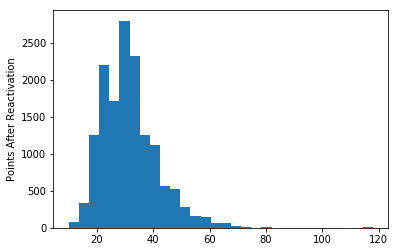

In [155]:
plt.hist(MENA['age'], bins=30)
plt.ylabel('Points After Reactivation')

In [168]:
CORbySuvrey = (MENA_NEAR.groupby(['status', 'name']).size())
CORbySuvrey

status  name                                
1       NearDormants_Marketing_Calls_2018Apr    2259
        NearDormants_Marketing_Calls_2018Feb      15
        NearDormants_Marketing_Calls_2018Jan    1605
        NearDormants_Marketing_Calls_2018Jul    2678
        NearDormants_Marketing_Calls_2018Jun    2242
        NearDormants_Marketing_Calls_2018Mar    1829
2       NearDormants_Marketing_Calls_2018Apr      32
        NearDormants_Marketing_Calls_2018Feb       1
        NearDormants_Marketing_Calls_2018Jan      51
        NearDormants_Marketing_Calls_2018Jul      10
        NearDormants_Marketing_Calls_2018Jun      11
        NearDormants_Marketing_Calls_2018Mar      40
3       NearDormants_Marketing_Calls_2018Apr       1
        NearDormants_Marketing_Calls_2018Jan       6
        NearDormants_Marketing_Calls_2018Jul       1
        NearDormants_Marketing_Calls_2018Jun       3
        NearDormants_Marketing_Calls_2018Mar       4
8       NearDormants_Marketing_Calls_2018Apr       1
 

In [172]:
StatusbyAgegroup = (MENA_NEAR.groupby(['agegroup', 'status']).size())
StatusbyAgegroup

agegroup  status
18-29     1         4253
          2           60
          3            8
          8            1
          15         254
          16          61
          18           1
30-39     1         3470
          2           56
          3            2
          15         149
          16          17
          18           2
40+       1         2905
          2           29
          3            5
          8            4
          15         127
          16          14
          18           2
dtype: int64

In [174]:
MENA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14935 entries, 1 to 51230
Data columns (total 13 columns):
pmxid                      14935 non-null int64
surveyid                   14935 non-null int64
name                       14935 non-null object
timestamp                  14935 non-null datetime64[ns]
status                     14935 non-null int64
countryofresidence         14935 non-null int32
pollingpoints              14935 non-null int64
SurveysFromReactivation    14935 non-null int64
PointsFromReactivation     11030 non-null float64
age                        14935 non-null float64
sourceid                   14935 non-null object
DaysInThePanel             14851 non-null float64
agegroup                   14935 non-null object
dtypes: datetime64[ns](1), float64(3), int32(1), int64(5), object(3)
memory usage: 1.5+ MB


In [175]:
MENA.describe()

,pmxid,surveyid,status,countryofresidence,pollingpoints,SurveysFromReactivation,PointsFromReactivation,age,DaysInThePanel
count,1.493500e+04,14935.000000,14935.000000,14935.000000,14935.000000,14935.000000,11030.000000,14935.000000,14851.000000
mean,4.343471e+07,623493.175092,2.043991,43.364044,1736.796451,45.498627,283.202176,31.472983,824.161269
std,1.481246e+07,22444.870646,3.656213,44.248852,1988.521809,36.221402,1154.501628,10.001067,908.195292
min,2.290539e+06,588032.000000,1.000000,14.000000,0.000000,0.000000,-17275.000000,10.000000,2.000000
25%,3.829156e+07,610800.000000,1.000000,14.000000,470.000000,13.000000,100.000000,24.000000,289.000000
50%,4.940104e+07,620078.000000,1.000000,18.000000,1220.000000,39.000000,250.000000,30.000000,460.000000
75%,5.384585e+07,642888.000000,1.000000,115.000000,2425.000000,70.000000,600.000000,37.000000,898.500000
max,6.197075e+07,650522.000000,18.000000,115.000000,37495.000000,168.000000,6100.000000,118.000000,4860.000000
